In [2]:
import tensorflow as tf
import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

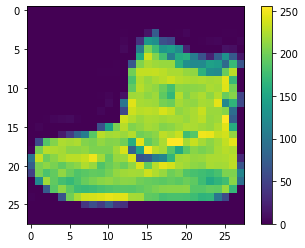

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

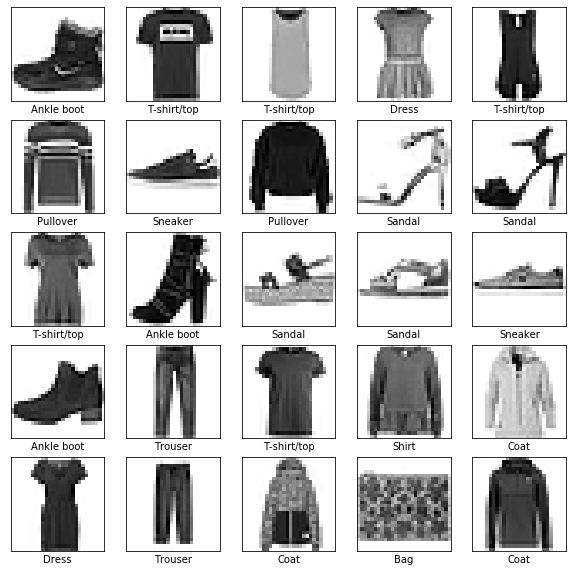

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=3)


W0305 09:07:09.406781 139863664113152 deprecation_wrapper.py:119] From /home/ishanu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/3
60000/60000 [==============================] - 4s 64us/step - loss: 0.5035 - accuracy: 0.8243
Epoch 2/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.3767 - accuracy: 0.8660
Epoch 3/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.3398 - accuracy: 0.8760


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/step
Test accuracy: 0.8621000051498413


In [13]:
predictions = model.predict(test_images)
print(predictions[0])

[6.2336738e-05 4.7034027e-06 7.4529044e-06 5.0627909e-07 3.6277877e-05
 5.0356299e-02 2.1660466e-05 2.7677093e-02 1.2554212e-03 9.2057824e-01]


In [14]:
import pandas as pd
pred=pd.DataFrame(predictions)
import seaborn as sns

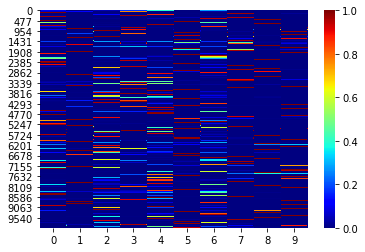

In [15]:
sns.heatmap(pred,cmap='jet')

In [16]:
np.argmax(predictions, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

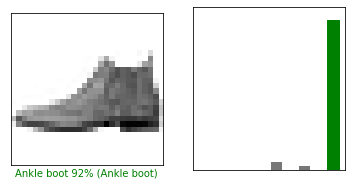

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


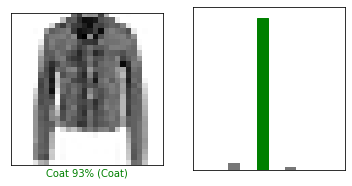

In [19]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

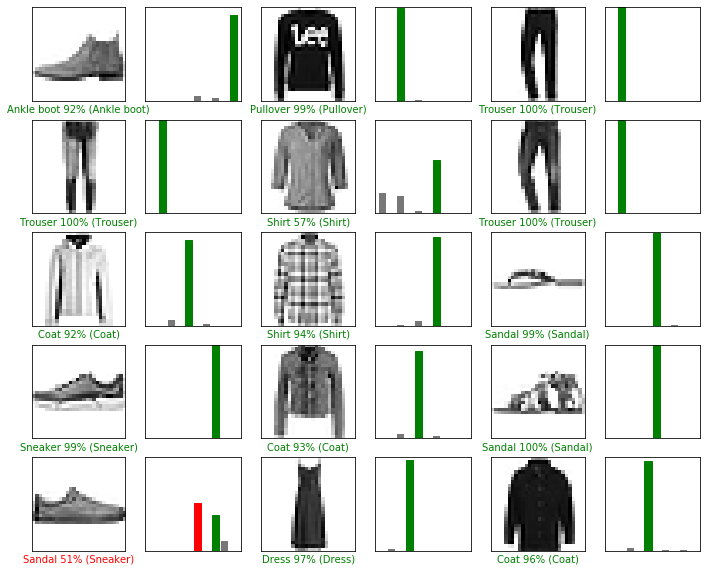

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
# single prediction
# Grab an image from the test dataset 
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[6.2336680e-05 4.7034027e-06 7.4529048e-06 5.0627818e-07 3.6277881e-05
  5.0356265e-02 2.1660468e-05 2.7677080e-02 1.2554200e-03 9.2057830e-01]]


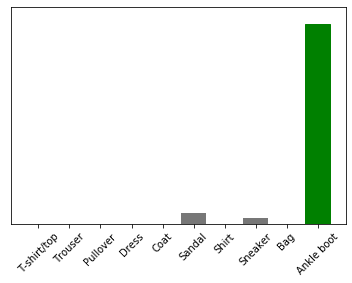

In [22]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [23]:
prediction_result = np.argmax(predictions_single[0])
prediction_result

9